## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [3]:
# Investigating unique values in columns of interest
print('Groups: {}'.format(df['group'].unique()))
print('Landing pages: {}'.format(df['landing_page'].unique()))
print('Converted: {}'.format(df['converted'].unique()))

Groups: ['control' 'treatment']
Landing pages: ['old_page' 'new_page']
Converted: [0 1]


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
# obtaining unique number of values ofr user_id column
unique_users_num = df.user_id.nunique()
print('Unique users: {}'.format(unique_users_num))

Unique users: 290584


d. The proportion of users converted.

In [6]:
# Compute proportion of users converted without any further data investigation
users_conv = df.query('converted == 1').user_id.nunique()
print('Proportion of users converted : {:.3f} %'.format(100.0*users_conv/unique_users_num))

Proportion of users converted : 12.104 %


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Checking when the new_page and old_page do not line up with treatment and control respectively

# First checking for treatment and new_page missmatch
df_new_page = df.query('landing_page == "new_page"')
df_new_page_not_treatment = df_new_page.query('group != "treatment"')

# Then checking for control and old_page missmatch
df_old_page = df.query('landing_page == "old_page"')
df_old_page_not_control = df_old_page.query('group != "control"')

new_page_not_treatment = df_new_page_not_treatment.shape[0]
old_page_not_control = df_old_page_not_control.shape[0]

print('New page not allignes with treatment {} times'.format(new_page_not_treatment))

# means treatment not alligned with new_page, but with old_page
print('Old page allignes with treatment (not control) {} times'.format(old_page_not_control)) 

# Total of missmatchs on both sides
print('Treatment not alligned with new_page {} times'.format(new_page_not_treatment+old_page_not_control))

New page not allignes with treatment 1928 times
Old page allignes with treatment (not control) 1965 times
Treatment not alligned with new_page 3893 times


f. Do any of the rows have missing values?

In [8]:
print('No missing values')

No missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#drop the rows that do not allign new_page w/ treatment and old_page w/ control (these might have innacurate data)
df2 = df.drop(df_new_page_not_treatment.index).copy()
df2.drop(df_old_page_not_control.index, inplace=True)

print('df2 should have: {} rows\n'.format(df.shape[0]-(new_page_not_treatment+old_page_not_control)) )

df2.info()

df2 should have: 290585 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Unique user id in df2: {}'.format(df2.user_id.nunique()))

Unique user id in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Finding a duplicated user_id
dup_id = df2.user_id.value_counts().argmax()
print('Duplicated user_id: {}'.format(dup_id))

Duplicated user_id: 773192


c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query('user_id == {}'.format(dup_id)).head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Removing duplicated user_id
df2.drop_duplicates('user_id',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Calculating probability of an individual convertion rate regardless of the page
conv_ind = df2.query('converted == 1')
num_conv = conv_ind.shape[0]
print('Probability of converted individual regardless of the page: {:.4f}'.format(num_conv/df2.shape[0]))

Probability of converted individual regardless of the page: 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Control group individual conversion rate 
control_conv = conv_ind.query('group == "control"').shape[0]
control_group = df2.query('group=="control"').shape[0]
print('Probability of CONTROL page converted individual: {:.4f}'.format(control_conv/control_group))

Probability of CONTROL page converted individual: 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# Treatment group individual conversion rate 
treatment_conv = conv_ind.query('group == "treatment"').shape[0]
treatment_group = df2.query('group == "treatment"').shape[0]
print('Probability of TREATMENT page converted individual: {:.4f}'.format(treatment_conv/treatment_group))

Probability of TREATMENT page converted individual: 0.1188


d. What is the probability that an individual received the new page?

In [18]:
# probability an individual got the new page
new_page_ind = df2.query('landing_page == "new_page"').shape[0]
print('Probability and individual got the NEW PAGE: {:.4f}'.format(new_page_ind/df2.shape[0]))

Probability and individual got the NEW PAGE: 0.5001


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The information above tells us that:
1. The probability of an individual to convert regardless of the page is 0.1196
2. The probability of an individual in the control group/ old page to convert is 0.1204
3. The probability of an individual in the treatment group/ new page to convert is 0.1188
4. The probability of an individual to get the new page (be in treatment group) is 0.5001, which is basically 0.5

Based on those probabilities one can see that the difference between 1 and 2 is 0.0015 which indicates they are very close to each other. The statistical significance might not exist, but there is not enough evidence to conclude anything until we do an A/B test with a proper hypothesis in which we want to know if the new page on average has a higher successful convert rate than the old page. After the A/B test we will understand statiscal significance, but it will be very important to consider the practical significance of our result

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} - p_{old} \leq 0 $$
$$ H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
def calc_p_new(df):
    """
    The function calculates the proportion of new pages that have a successful converted rate
    Arguments:
        @df: Pandas.DataFrame that contains columns landing_page and converted.
    Return the proportion of new pages with successful convertion
    """
    p_new_succ = df.query('landing_page == "new_page" and converted == 1').shape[0]
    p_new = df.query('landing_page == "new_page"').shape[0]
    prop_p_new = p_new_succ/p_new
    return prop_p_new

#compute proportion of new pages with successful convertion
p_new_prop = calc_p_new(df2)
print('p_new under sample  : {:.4f} %'.format(100.0*p_new_prop))

# H0: assumed that the nul p_new and p_old converted success rates are equal.
# Meaning p_new and p_old converted success rates for null are calculated using the converted success rate regardless
# of the type of page
p_new_null = df2.converted.mean()
print('p_new under the assumed H0 conditions: {:.4f}%'.format(100.0*p_new_null))

p_new under sample  : 11.8808 %
p_new under the assumed H0 conditions: 11.9597%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
def calc_p_old(df):
    """
    The function calculates the proportion of old pages that have a successful converted rate
    Arguments:
        @df: Pandas.DataFrame that contains columns landing_page and converted.
    Return the proportion of old pages with successful convertion
    """
    p_old_succ = df.query('landing_page == "old_page" and converted == 1').shape[0]
    p_old = df.query('landing_page == "old_page"').shape[0]
    prop_p_old = p_old_succ/p_old
    return prop_p_old

#compute proportion of old pages with successful convertion
p_old_prop = calc_p_old(df2)
print('p_old under sample : {:.4f} %'.format(100.0*p_old_prop))

# H0: assumed that the nul p_new and p_old converted success rates are equal.
p_old_null = p_new_null
print('p_old under the assumed H0 conditions: {:.4f}%'.format(100.0*p_old_null))

p_old under sample : 12.0386 %
p_old under the assumed H0 conditions: 11.9597%


c. What is $n_{new}$?

In [21]:
# Size of new page samples
sample_size_new_page = df2.query('landing_page == "new_page"').shape[0]
print('Sample size new_page: {}'.format(sample_size_new_page))

Sample size new_page: 145310


d. What is $n_{old}$?

In [22]:
# Size of old page samples
sample_size_old_page = df2.query('landing_page == "old_page"').shape[0]
print('Sample size old_page: {}'.format(sample_size_old_page)) 

Sample size old_page: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulate with H0 assumption new_page data
new_page_converted = np.random.choice([1,0], size=sample_size_new_page, p=[p_new_null,1-p_new_null])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Simulate with H0 assumption old_page data
old_page_converted = np.random.choice([1,0], size=sample_size_old_page, p=[p_old_null, 1-p_old_null])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
def calc_p(array):
    """
    Arguments:
        @array: numpy array that we will take its mean
    Return mean of the @array argument
    """
    p = array.mean()
    return p

In [26]:
# Calculating the mean for H0 and H1
p_new_null_mean = calc_p(new_page_converted)
p_old_null_mean = calc_p(old_page_converted)

p_diff = p_new_prop - p_old_prop

p_diff_sim = p_new_null_mean - p_old_null_mean

print('No simulated p_diff (under the sample): {:.4f} %'.format(100.0*p_diff))
print('Simulated samples p_diff (under H0 assumed conditions): {:.4f}%'.format(100.0*p_diff_sim))

No simulated p_diff (under the sample): -0.1578 %
Simulated samples p_diff (under H0 assumed conditions): 0.0879%


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
# Simulating the null values with 10000 samples 
p_diffs = []

for _ in range(10000):
    new = np.random.choice([1,0], size=sample_size_new_page, p=[p_new_null,1-p_new_null])
    old = np.random.choice([1,0], size=sample_size_old_page, p=[p_old_null,1-p_old_null])
    p_new_mean = calc_p(new)
    p_old_mean = calc_p(old)
    p_diffs.append(p_new_mean - p_old_mean)
    
p_diffs = np.array(p_diffs)

In [28]:
# Simulation descriptive statistics 
p_diffs_sim10000 = p_diffs.mean()
print('Mean: {:.4f}%\nStd: {:.4f}'.format(p_diffs_sim10000,p_diffs.std()))

Mean: 0.0000%
Std: 0.0012


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

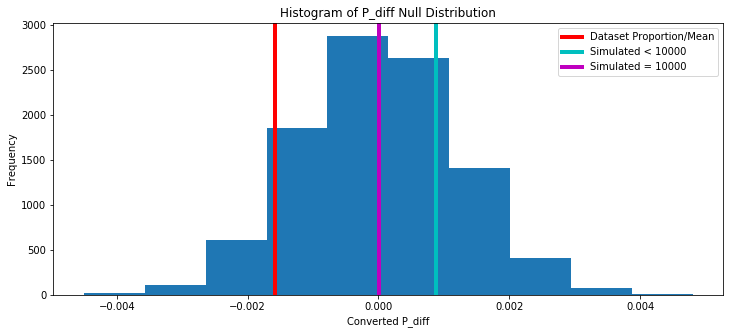

In [29]:
# Plotting histogram of means computed and the simulated H0
plt.figure(figsize=(12,5))
plt.hist(p_diffs)
plt.axvline(p_diff,c='r',lw=4,label='Dataset Proportion/Mean')
plt.axvline(p_diff_sim, c='c', lw=4, label='Simulated < 10000')
plt.axvline(p_diffs_sim10000, c='m', lw=4, label='Simulated = 10000')
plt.xlabel('Converted P_diff')
plt.ylabel('Frequency')
plt.title('Histogram of P_diff Null Distribution')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# Analyzing the means and the histogram values to understand if our null hypothesis is rejected
print('No simulated p_diff (under the sample): {:.4f} %'.format(100.0*p_diff))
print('Simulated 10000 samples p_diff (under H0 assumed conditions): {:.4f}%'.format(100.0*p_diffs_sim10000))

prop_greater_pdiffs = p_diffs_sim10000 - p_diff
print('Proportion greater {:.4f}%'.format(100.0*prop_greater_pdiffs))

p_val = (p_diffs > p_diff).mean()
print('Pval: {:.4f}'.format(p_val))

No simulated p_diff (under the sample): -0.1578 %
Simulated 10000 samples p_diff (under H0 assumed conditions): 0.0015%
Proportion greater 0.1593%
Pval: 0.9065


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The mean of the simulated 10,000 samples is the difference of the treatment group mean of converted values and the control group mean of converted values. This is close to 0 which indicates the distribution is a normal distribution. Our hypothesis statement stated that for the null hypothesis the difference of means between treatement and control successful convert rates was 0. 

>**Note:**We were able to simulate such null hypothesis by assuming that the success rate for treatment and control were the same

On the other hand, the alternative hypothesis has a mean different than 0. This leads to further analysis and to take the p-value to understand if we have something statistically significant. In this case our p-value was 0.9054 and if the typical Error I threshold is 0.05 then we do not have enough information to reject our $H_0$ (null hypothesis).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
# Import stats models 
import statsmodels.api as sm

# Getting back the sample sizes for the data as well as the success rate mean
convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = sample_size_old_page
n_new = sample_size_new_page

/Users/arturops/anaconda/envs/sdcar/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
#Displaying the data that we will feed to compute the z_score and p-value using statsmodels
print(convert_old, convert_new, n_old, n_new)

# Computing z_score and p-value
z_score, pval = sm.stats.proportions_ztest([convert_new, convert_old],[n_new, n_old], alternative='larger')

print('Zscore: {:.3f}\np-val: {:.4f}'.format(z_score, pval))

17489 17264 145274 145310
Zscore: -1.311
p-val: 0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The $Z_{score}$ in this case determines if our alternative hypothesis mean is away from the mean and in which direction. The $Z_{score}$ we computed is -1.311 which indicates the alternative hypothesis mean is 1.311 standard deviations awaya from the mean and the fact that has negative sign means it is to the left. This matches what we saw in our histogram (red line).

The p-value agrees with the value calculated above. It basically is trying to help us determine that the old page has more succesful conversion rate. Based on this information we do not have enough data to reject $H_0$.
However, we might want to check the time trend between the old page samples and new page as the long time users might be experiencing change aversion and the moderate new users could see benefit on the change. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Creating a new copy of our data frame to do all the regression fitting and column manipulation if needed
df3 = df2.copy()

# Adding intercept and dummy variables for the page type
df3['intercept'] = 1
df3[['ab_page','old_page']] = pd.get_dummies(df3['landing_page'])
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
# Logistic fitting
logit = sm.Logit(df3['converted'],df3[['intercept','ab_page']]) 
r = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# Displaying results of our model
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:29:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The null hypothesis ($H_0$) and alternative hypothesis ($H_1$) are basically related to the **ab_page** column. If we look at the $Z_{score}$ we can check that it is the same as what we computed above. The coefficient in this case has to be converted to $1/e^{-0.015}$ as we are using logistic regression and the sign is negative. Then we get a value of 0.985 which tell us that the relation of success covertion rate in new pages decreases 0.985 compared to the old pages. This is implying the old pages have a higher success convertion rate which is exactly what we saw before.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

After the analysis above we can tell that the hypothesis is related to the column **ab_page** and it will be a good idea to add another variable to understand better if the model has generalized good enough or if there are more pieces to it that can make it more accurate. It can be that depending on the country the new page had more acceptance. Thus, it is always good to add and check if a model improved with a new variable, that way one can also check for multicolinearity and remove the variables that are correlated to fine tune the model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
# Importing a joining a new variable (country) to add to the fit
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0


In [37]:
# Investigating number of unique countries in the dataset
df_new.country.nunique()

3

In [38]:
# Investigating the unique countries in the dataset
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [39]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)
df_new.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
### Fit Logistic Model using intercept and country(UK as baseline) And Obtain the Results
df_new['intercept'] = 1
logit2 = sm.Logit(df_new['converted'],df_new[['intercept','CA','US']])
r2 = logit2.fit()
r2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        14:29:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [41]:
## Fitting using intercept, country(UK as baseline), and ab_page (old_page as baseline)
logit3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','US']])
r3 = logit3.fit()
r3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:29:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

After adding the new variable and comparing a model only with it we noticed that they added variables have a $pvalue < 0.5$ which means they have some significance added to our model. 

<a id='conclusions'></a>
## Conclusions

After all the A/B Test we performed, we learned that we do **not have enough information to reject $H_0$** and the **model to predict the convert individual is a logistic regression** as the converted value is binary (meaning only True =1 or False = 0).

During the whoel analysis we obtained the mean for the $H_1$ and $H_0$, we noticed that the $H_1$ mean was on the left side of the distribution while the simulated $H_0$ mean was very close to the center in 0. The difference in means gave us a $Z_{score} = -1.311$ for the $H_1$ mean, meaning that it was on the left side of the distrbution and not centered at all. We plotted a histogram with the means to verify that all of it was correct and it confirmed our assumption. Although it looked like the mean was further away in the histogram we know that we need to know the p-value to determine if that was true. 
When we computed p-value, this value turned out to be 0.9051 which is greater than the Error Type 1 threshold of 0.05. This indicates that there is some statistical significance the old page actually had a higher sucessful conversion of individuals. Nevertheless, we cannot confirm this as an absolute true, but only agree that there is no information to reject $H_0$. In fact, the data also showed the old page to have a higher proportion of conversion, but in reality boundary conditions the change is so small that even if the old page has more success on conversion it actually is for an approximately amount of 0.16% of the people, which to be honest shows no practical significance. As a result, we shouldn't stop using the old page, but probably that's what we want as implementing the new page will cost and take time while it might not apport anything. However, we should think that people might be experiencing an aversion to change and we probably wanted to run teh test longer if needed. Another important question is if this change will be better for the future fo the company then it might be wise to change to the new page as it doesn't have much difference with the old and it can bing greater benefit even though it seems riskier at first. In any case the external factors and not just the math should also be consider, but if we were to decide based on math an strongly believeing our study covers almost all we needed then we would stick to the old page.

The logistic model we used also included the country. I believe it might be msarter to decide per country if the new page performs better, but that will be future work.
